# EDA_1 (exploratory data analysis)
## 24-1-25

In [5]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [7]:
# printing the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [8]:
# dataframe attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [9]:
# drop duplicate column(emp c) and unnamed column
data1=data.drop(['Unnamed: 0',"Temp C"],axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [11]:
# convert the month column data type to float data type
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [12]:
# print all duplicated rows
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [13]:
# drop duplicated rows 
data1.drop_duplicates(keep='first',inplace=True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


### Rename the columns

In [15]:
# change column names (rename the columns)
data1.rename({'Solar.R':'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


### Impute the missing values

In [17]:
# Display data1 info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [18]:
#display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

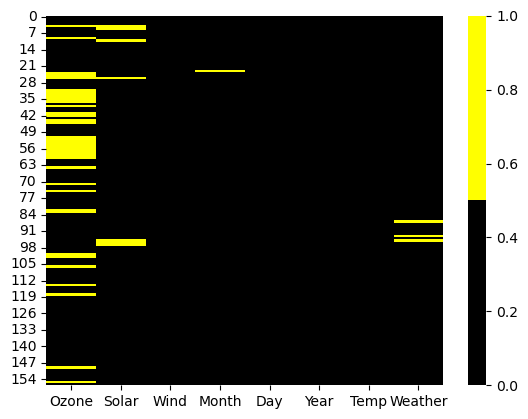

In [19]:
#Visualize data1 missing values using heat map
cols = data1.columns
colors = ['black','yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar=True)

In [20]:
#Find the mean and median values of each numeric
#Imputation of missing values with median
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [21]:
#replcae the ozone missing values with median values
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [22]:
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
print("Median of solar: ", median_solar)
print("Mean of solar: ", mean_solar)

Median of solar:  199.0
Mean of solar:  185.36666666666667


In [23]:
data1['Solar'] = data1['Solar'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [24]:
#find the mode values of categories column (weather)
print(data1['Weather'].value_counts())
mode_weather = data1['Weather'].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [25]:
# input missing values (replace NaN with mode etc.) of "weather" using fillna()
data1['Weather'] = data1['Weather'].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

## Detection of outliners in the colums 

#### Method 1: using histogram and box plots

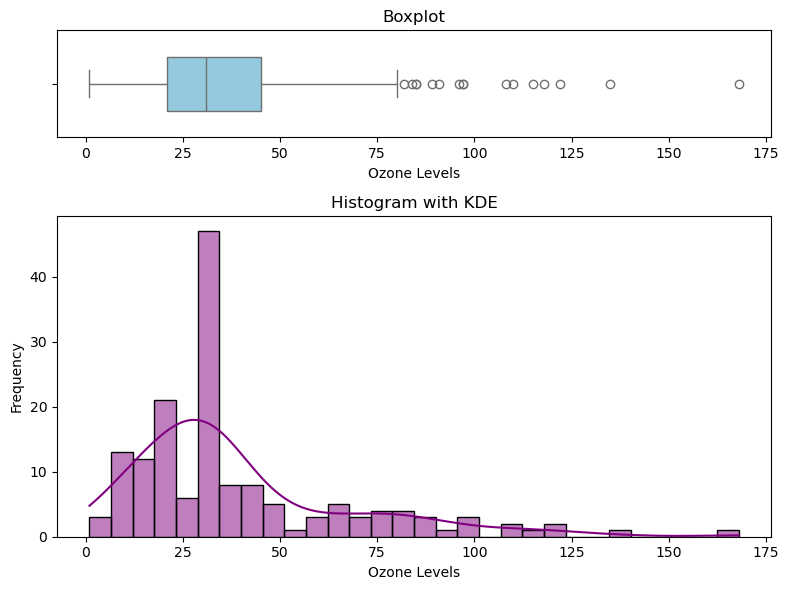

In [28]:
# create a figure with two subplots, stacked vertically
fig,axes = plt.subplots(2,1, figsize = (8,6), gridspec_kw = {'height_ratios':[1,3]})

# plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"],ax = axes[0],color="skyblue",width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

#Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1['Ozone'],kde=True,ax=axes[1],color='purple',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

#Adjust layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

### Observations
##### .👍 The ozone column has extreme values beyond 81 as seen from box plot
##### .👍 The same is confirmed from the below right_skewed histogram

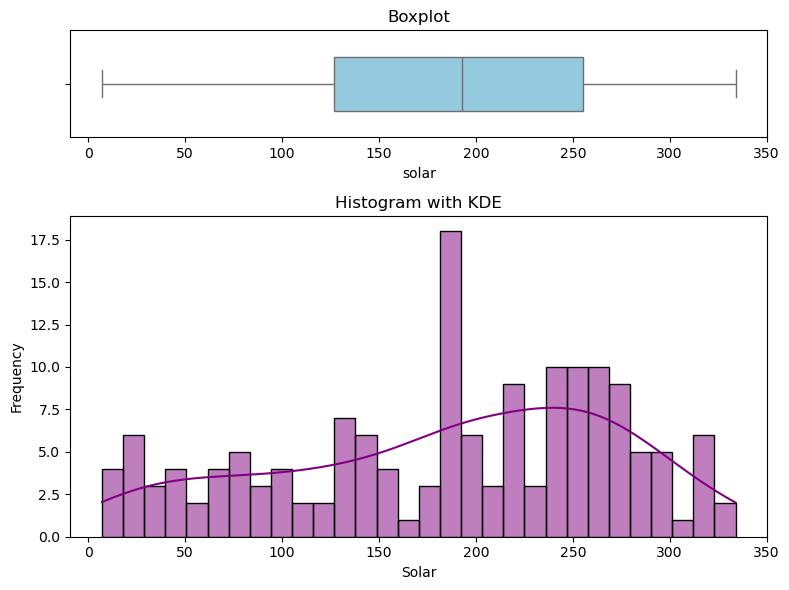

In [30]:
# create a figure with two subplots, stacked vertically
fig,axes = plt.subplots(2,1, figsize = (8,6), gridspec_kw = {'height_ratios':[1,3]})

# plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"],ax = axes[0],color="skyblue",width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("solar")

#Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1['Solar'],kde=True,ax=axes[1],color='purple',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar")
axes[1].set_ylabel("Frequency")

#Adjust layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

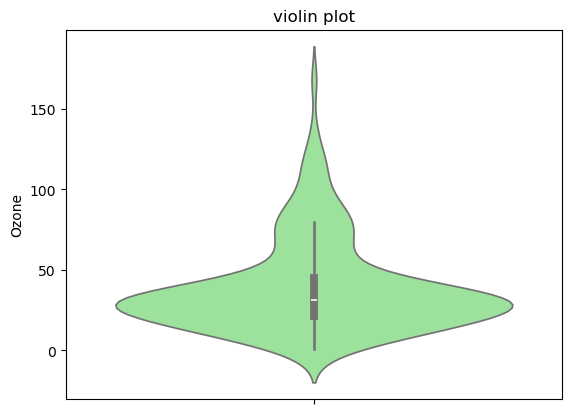

In [31]:
#create a figure for violin plot

sns.violinplot(data=data1['Ozone'],color='lightgreen')
plt.title("violin plot")
 #show the plot 
plt.show()

C:\Users\madha\AppData\Local\Temp\ipykernel_5532\2455976658.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x='Weather', y='Ozone',color='orange',palette='Set2',size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

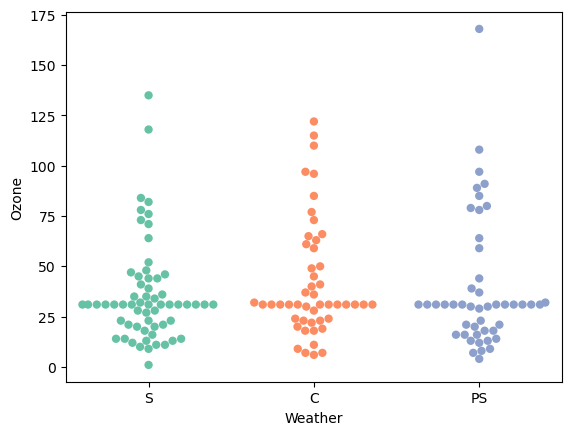

In [32]:
sns.swarmplot(data=data1, x='Weather', y='Ozone',color='orange',palette='Set2',size=6)

C:\Users\madha\AppData\Local\Temp\ipykernel_5532\2825917897.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1,x='Weather',y='Ozone',color='orange',palette='Set1',size=6,jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

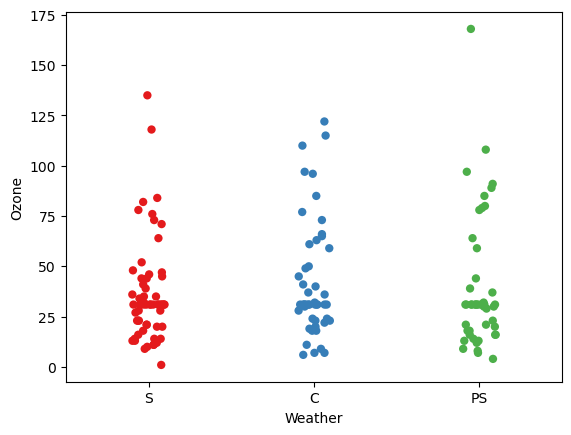

In [57]:
sns.stripplot(data=data1,x='Weather',y='Ozone',color='orange',palette='Set1',size=6,jitter=True)

<Axes: xlabel='Ozone', ylabel='Density'>

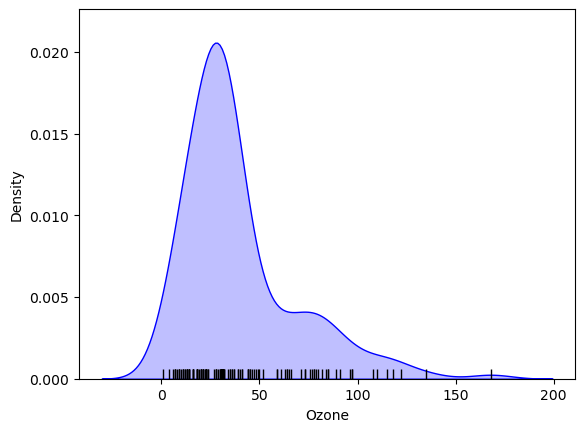

In [59]:
sns.kdeplot(data=data1['Ozone'], fill=True, color='blue')
sns.rugplot(data=data1['Ozone'],color='black')

<Axes: xlabel='Weather', ylabel='Ozone'>

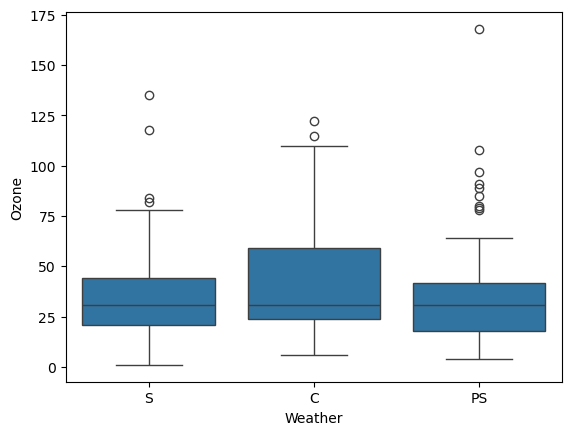

In [61]:
# Category wise boxplot for ozone
sns.boxplot(data = data1, x = "Weather", y = "Ozone")

# Correlation coefficient and pair plots

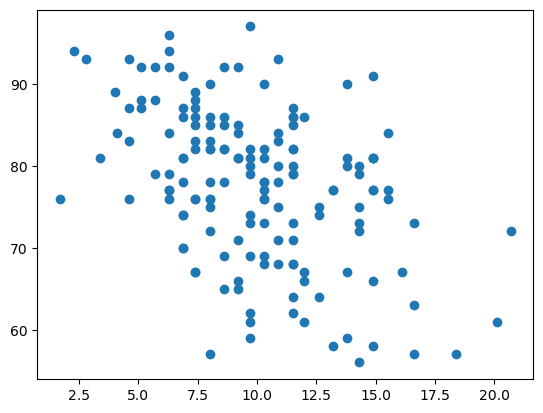

In [66]:
plt.scatter(data1["Wind"], data1["Temp"])

In [69]:
# Compute pearson correlation coefficient
#between Wind speed and temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [75]:
#Read all numeric columns into a new table
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,185.366667,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77
